In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler #veriyi scale ediyor (z-score) / z = (x - mü)/sigma(std)
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pylab as plt
import pandas as pd

In [17]:
X, y = fetch_california_housing(return_X_y=True) # oto feature selection

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=10))
])

In [13]:
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', KNeighborsRegressor(n_neighbors=1))],
 'transform_input': None,
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(n_neighbors=1),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 1,
 'model__p': 2,
 'model__weights': 'uniform'}

In [14]:
mod = GridSearchCV(estimator=pipe,
                   param_grid={'model__n_neighbors': [1,2,3,4,5,6,7,8,9,10]},
                   cv=3
                   )

In [15]:
mod.fit(X,y)
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005351,0.003182,0.083353,0.006798,1,{'model__n_neighbors': 1},0.324068,0.334830,0.323371,0.327423,0.005245,10
1,0.003363,0.000541,0.086600,0.006280,2,{'model__n_neighbors': 2},0.468788,0.503457,0.424388,0.465544,0.032361,9
2,0.002968,0.000035,0.088916,0.008255,3,{'model__n_neighbors': 3},0.518547,0.543340,0.473595,0.511827,0.028867,8
3,0.003253,0.000153,0.099083,0.004697,4,{'model__n_neighbors': 4},0.540323,0.564974,0.499827,0.535041,0.026857,7
4,0.003074,0.000103,0.100742,0.009261,5,{'model__n_neighbors': 5},0.551149,0.579313,0.511781,0.547414,0.027696,6
5,0.003040,0.000103,0.109704,0.008932,6,{'model__n_neighbors': 6},0.558435,0.586185,0.521134,0.555251,0.026652,5
6,0.003212,0.000264,0.110602,0.010583,7,{'model__n_neighbors': 7},0.564207,0.590509,0.525223,0.559979,0.026820,4
7,0.002966,0.000094,0.111416,0.006061,8,{'model__n_neighbors': 8},0.568637,0.593942,0.529337,0.563972,0.026580,3
8,0.002986,0.000025,0.112902,0.005379,9,{'model__n_neighbors': 9},0.571972,0.594863,0.529928,0.565588,0.026891,2
9,0.002901,0.000053,0.118523,0.012727,10,{'model__n_neighbors': 10},0.573760,0.595831,0.532973,0.567522,0.026038,1


In [18]:
pred = mod.predict(X)

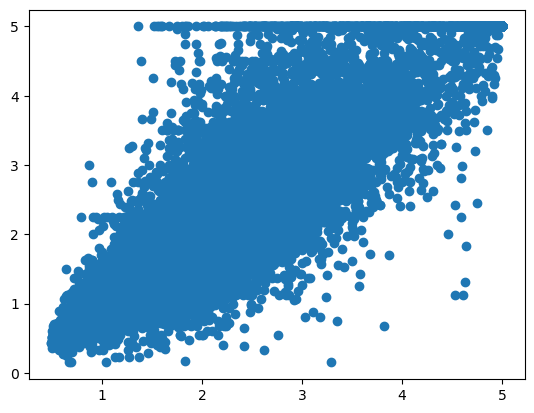

In [19]:
plt.scatter(pred, y)